### 주택 가격 예측 : 회귀문제

보스턴 주택 가격 데이터셋

In [2]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 데이터 준비

데이터 정규화 하기

In [6]:
# 훈련 데이터셋과 테스트 데이터셋을 정규화

mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean
test_data /= std

모델 구성

In [7]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation = 'relu'),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

  return model

### k-겹 검증을 사용한 훈련 검증

In [10]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

k = 4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k) :
  print(f'{i}번째 폴드 처리중')
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis = 0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs, batch_size = 16, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

0번째 폴드 처리중
1번째 폴드 처리중
2번째 폴드 처리중
3번째 폴드 처리중


In [12]:
all_scores

[1.9054689407348633, 2.5431180000305176, 2.507709503173828, 2.413414239883423]

In [14]:
np.mean(all_scores)

2.342427670955658

In [18]:
k = 4

num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k) :
  print(f'{i}번째 폴드 처리중')
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis = 0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_targets),
            epochs = num_epochs, batch_size = 16, verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

0번째 폴드 처리중
1번째 폴드 처리중
2번째 폴드 처리중
3번째 폴드 처리중


k 겹 검증 점수 편균을 기록하기

In [19]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

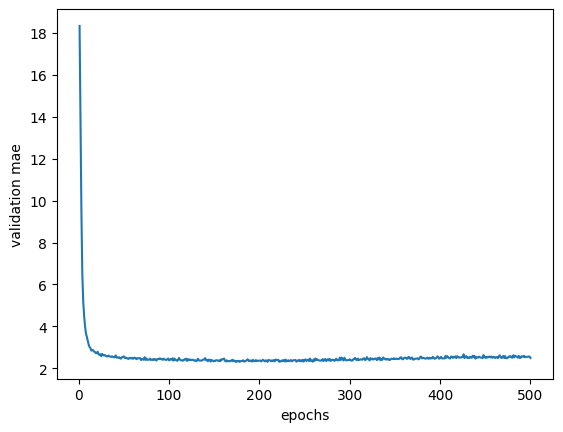

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

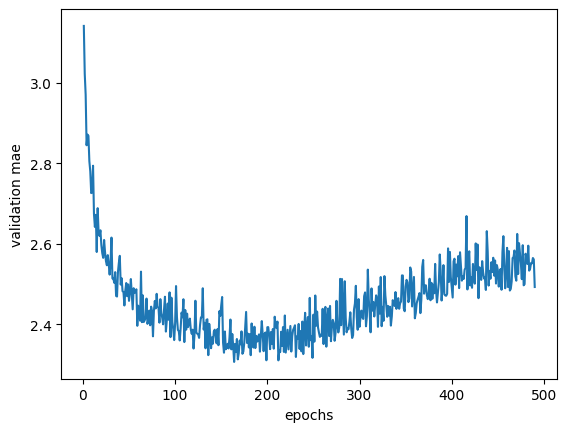

In [22]:
truncated_mae_history = average_mae_history[10:]

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

In [23]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 130, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 14.8780 - mae: 2.5574


### 새로운 데이터 예측하기

In [24]:
predictions = model.predict(test_data)
predictions[1]

4/4 [==============================] - 0s 3ms/step


array([17.851858], dtype=float32)

### 정리

### 케라스 완전 정복

sequential 모델

sequential 클래스

In [25]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

점진적으로 sequential 모델 만들기

In [28]:
model = keras.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

가중치를 만들기 위해 모델을 호출

- build 함수는 모델의 가중치를 초기화
- (None, 3)에서 None은 배치 크기를 나타내며, 이는 학습 도중에 얼마나 많은 샘플이 한 번에 네트워크를 통과할지를 결정. 학습 및 추론 단계에서 서로 다른 배치 크기를 사용 가능
- 3은 입력 텐서의 차원을 나타내며, 여기서는 입력 데이터가 3차원임을 의미
- 모델이 어떠한 배치 크기도 수용할 수 있고, 각 입력 샘플이 3차원이라는 것을 나타내며 이런 정보를 바탕으로, 모델의 가중치는 적절하게 초기화

In [31]:
# 모델의 가중치를 미리 초기화 해야 할 필요가 있을 수 있고 이런 경우에는 model.build(input_shape) 를 호출
# 입력 텐서의 크기를 명시적으로 지정

model.build(input_shape = (None, 3))
model.weights[:1]

[<tf.Variable 'dense_38/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 4.37334180e-02,  2.46343791e-01,  1.16445005e-01,
          1.44514143e-02,  2.05449820e-01,  7.75390863e-03,
         -9.25094336e-02,  2.76872098e-01,  9.40021574e-02,
          7.91661143e-02,  1.62744194e-01, -2.73721784e-01,
          3.19462419e-02, -7.11882114e-03, -2.04390123e-01,
          2.87877023e-02,  1.94129586e-01,  1.47550195e-01,
          1.04547888e-01,  4.97753918e-02,  1.40359700e-02,
          2.91650355e-01,  1.25898898e-01,  1.15963697e-01,
          1.94727898e-01,  1.36054695e-01, -4.93517965e-02,
         -6.74395114e-02,  1.66597456e-01, -2.09208071e-01,
          1.62626982e-01, -6.35306835e-02, -2.17279539e-01,
         -9.45618898e-02, -3.80497873e-02, -3.64904404e-02,
         -9.70322192e-02,  2.28638649e-02,  1.83059454e-01,
          5.26335835e-03,  8.15142989e-02, -1.65878356e-01,
         -5.86914718e-02, -4.29151356e-02, -2.05565497e-01,
          5.90744019e-02,  1.9

summary 메서드

In [33]:
# Dense (또는 fully connected) 레이어 파라미터 개수는 (입력 단위 개수 + 1) * 출력 단위 개수로 계산

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                256       
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [44]:
model = keras.Sequential(name = 'my_example_model')
model.add(layers.Dense(64, activation = 'relu', name = 'my_first_layer'))
model.add(layers.Dense(10, activation = 'softmax', name = 'my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


모델의 입력 크기를 미리 지정하기

In [36]:
model = keras.Sequential()
model.add(keras.Input(shape = (3,)))
model.add(layers.Dense(64, activation = 'relu'))

In [38]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                256       
                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 함수형 API

In [40]:
inputs = keras.Input(shape = (3, ), name = 'my_input')
features = layers.Dense(64, activation = 'relu')(inputs)
outputs = layers.Dense(10, activation = 'softmax')(features)

model = keras.Model(inputs = inputs, outputs = outputs)

In [41]:
inputs = keras.Input(shape = (3, ), name = 'my_input')

In [42]:
inputs.shape

TensorShape([None, 3])

In [45]:
inputs.dtype

tf.float32

In [46]:
features = layers.Dense(64, activation = 'relu')(inputs)

In [47]:
features.shape

TensorShape([None, 64])

In [48]:
outputs = layers.Dense(10, activation = 'softmax')(features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_44 (Dense)            (None, 64)                256       
                                                                 
 dense_45 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


다중 입력 다중 출력 모델

In [51]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape = (vocabulary_size,), name = 'title')
text_body = keras.Input(shape = (vocabulary_size,), name = 'text_body')
tags = keras.Input(shape = (num_tags,), name = 'tags')

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation = 'relu')(features)

priority = layers.Dense(1, activation = 'sigmoid', name = 'priority')(features)
department = layers.Dense(num_departments, activation = 'softmax', name = 'department')(features)

model = keras.Model(inputs = [title, text_body, tags],
                    outputs = [priority, department])

입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

In [59]:
num_samples = 1280

title_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size = (num_samples, num_tags))

priority_data = np.random.random(size = (num_samples, 1))
department_data = np.random.randint(0, 2, size = (num_samples, num_departments))

model.compile(optimizer = 'rmsprop',
              loss = ['mean_squared_error', 'categorical_crossentropy'],
              metrics = [['mean_absolute_error'], ['accuracy']])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs = 1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


In [58]:
num_samples = 1280

title_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size = (num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size = (num_samples, num_tags))

priority_data = np.random.random(size = (num_samples, 1))
department_data = np.random.randint(0, 2, size = (num_samples, num_departments))

model.compile(optimizer = 'rmsprop',
              loss = {'priority' : 'mean_squared_error', 'department' : 'categorical_crossentropy'},
              metrics = {'priority' : ['mean_absolute_error'], 'department' : ['accuracy']})

model.fit({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data},
          {'priority' : priority_data, 'department' : department_data},
          epochs = 1)

model.evaluate({'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data},
          {'priority' : priority_data, 'department' : department_data})

priority_preds, department_preds = model.predict(
    {'title' : title_data, 'text_body' : text_body_data, 'tags' : tags_data}
)

40/40 [==============================] - 0s 3ms/step
